# Load the dataset

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                   

df = pd.read_csv('https://raw.githubusercontent.com/OpenClassrooms-Student-Center/Evaluate-Improve-Models/master/house_prices.csv')
df.sample(5)

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),...,Garage Qual_Po,Garage Qual_TA,Garage Cond_Ex,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Garage Cond_TA,Paved Drive_N,Paved Drive_P,Paved Drive_Y,Pool QC_Ex,Pool QC_Fa,Pool QC_Gd,Pool QC_TA,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Misc Feature_Elev,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial,SalesPrice
1976,30,56.0,4480,5,5,1922,1950,0.0,782.0,0.0,240.0,1022.0,1022,0,0,1022,1.0,0.0,1,0,2,1,4,1,1922.0,1.0,184.0,0,122,20,0,0,0,0,2,2007,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,89500
2702,30,55.0,8250,5,7,1935,1950,0.0,0.0,0.0,0.0,0.0,1032,0,0,1032,0.0,0.0,1,0,2,1,6,1,1939.0,1.0,260.0,0,0,121,0,0,0,0,6,2006,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,125000
2768,85,57.0,8846,5,5,1996,1996,0.0,298.0,0.0,572.0,870.0,914,0,0,914,0.0,0.0,1,0,2,1,5,0,1998.0,2.0,576.0,0,0,0,0,0,0,0,7,2006,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,148000
8,120,39.0,5389,8,5,1995,1996,0.0,1180.0,0.0,415.0,1595.0,1616,0,0,1616,1.0,0.0,2,0,2,1,5,1,1995.0,2.0,608.0,237,152,0,0,0,0,0,3,2010,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,236500
758,50,60.0,5160,6,6,1927,1950,0.0,0.0,0.0,1204.0,1204.0,1204,462,0,1666,0.0,0.0,1,0,3,1,4,0,1927.0,1.0,384.0,0,0,148,0,0,0,0,8,2009,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,135000


# "Garage Area" and "SalesPrice" features are selected to analyze.

In [0]:

new_df = df[['Garage Area','SalesPrice']]
new_df.sample(5)

,Garage Area,SalesPrice
531,588.0,234500
1713,554.0,232698
1149,384.0,128000
553,360.0,76000
2472,0.0,132000


## Convert the data into numpy arrays of two variables, X and y.

In [0]:
X = np.array(new_df[['Garage Area']])
y = np.array(new_df[['SalesPrice']]) 
print(X.shape) # Vewing the shape of X
print(y.shape) # Vewing the shape of y



(2930, 1)
(2930, 1)


## Split train and test data with 0.2 ratio.

In [0]:
from sklearn.model_selection import train_test_split
# Spliting into train & test dataset
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2,random_state=15)

# Linear Regression
Train a linear regression.

In [0]:
from sklearn import linear_model 

# Creating a regressior model
regressor = linear_model.LinearRegression()
# Fiting the dataset into the model
regressor.fit(X_train,y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Calculate train and test R2.

In [0]:
from sklearn.metrics import r2_score

y_pred = regressor.predict(X_train)

y_pred2 = regressor.predict(X_test)
# R^2 (coefficient of determination) regression score function.

# code comes here
print("Train:", r2_score(y_train,y_pred)) 

# code comes here
print("Test:", r2_score(y_test,y_pred2))

Train: 0.41185642291512536
Test: 0.4021446938471793


## Print the bias and the slope.

In [0]:
print('Regressor coeffient or slope:',regressor.coef_[0][0])
print('Interception point with axis:',regressor.intercept_[0])

Regressor coeffient or slope: 240.1396087790633
Interception point with axis: 67120.45712450234


## Plot the test set with scatter plot and add the linear regression model line.
Remember linear regression recitation.

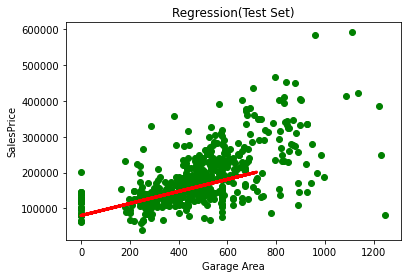

In [0]:

less_data = np.random.choice(606, 15)
d_X_train = X_train[less_data]
d_y_train = y_train[less_data]
regressor.fit(d_X_train,d_y_train) 

# Plot a graph with X_test vs y_test
plt.scatter(X_test,y_test,color="green")

# Regressior line showing
plt.plot(d_X_train,regressor.predict(d_X_train),color="red",linewidth=3)
plt.title('Regression(Test Set)')
plt.xlabel('Garage Area')
plt.ylabel('SalesPrice')
plt.show()

# Multiple Linear Regression
Select all features.




In [0]:
df2  = df.drop('SalesPrice', axis=1)

df3 = df2.fillna(0.0).astype(int)
X = df3
y = df[['SalesPrice']]

print(X.shape) # Vewing the shape of X
print(y.shape) # Vewing the shape of y



(2930, 304)
(2930, 1)


## Rescale the input features. Use MinMaxScaler.

---



---

*italicized text*

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

'''
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = # code comes here
'''
#df.dtypes

'\nfrom sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\nX = # code comes here\n'

## Train test split.

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=15)

## Fit regression model.

In [0]:
# Creating a regressior model
regressor = linear_model.LinearRegression()
# Fiting the dataset into the model
regressor.fit(X_train,y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Calculate train and test R2.

In [0]:
y_pred = regressor.predict(X_train)

y_pred2 = regressor.predict(X_test)
# R^2 (coefficient of determination) regression score function.

# code comes here
print("Train:", r2_score(y_train,y_pred)) 

# code comes here
print("Test:", r2_score(y_test,y_pred2))

Train: 0.3064593444866025
Test: 0.2975731566605675


## Print the regression coefficients.

In [0]:
print('Regressor coeffients for multiple linear regression:',regressor.coef_[0][0])

print('Interception point with axis:',regressor.intercept_[0])

Regressor coeffients for multiple linear regression: 168.19366678745513
Interception point with axis: 80131.0372792201


# Ridge Regression
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html

## Use cross-validation to estimate alpha. Set the fold size to 5.

In [0]:
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeCV
kfold = KFold(n_splits=5)

alphas=[1e-3, 1e-2, 1e-1, 1, 2, 5, 8, 10]
# Create and fit model
model_rcv = RidgeCV(alphas).fit(X, y)

model_rcv_temp = RidgeCV(alphas).fit(X, y)
# code comes here
model_rcv.score(X, y)
model_rcv_temp.score(X, y)


0.9120344271941544

## Calculate the train and test R2.

In [0]:
from sklearn.linear_model import Ridge
#rr = Ridge(alphas)
#rr.fit(X_train, y_train) 

rr = Ridge(alpha=5)
rr.fit(X_train, y_train) 

pred_train_rr= rr.predict(X_train)
print('Train: ',r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print('Test: ',r2_score(y_test, pred_test_rr))

Train:  0.4118564229151245
Test:  0.4021446957485382


## Print the best alpha.

In [0]:
print("Alpha:", model_rcv.alpha_)

Alpha: 5.0


## Print the regression coefficients.

In [0]:

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# Creating a regressior model
regressor = linear_model.LinearRegression()
# Fiting the dataset into the model
regressor.fit(X_train,y_train) 
print('Regressor coeffients for ridge regression:',regressor.coef_[0][0])
print('***********')

print('coefs:',coefs[0][0])




Regressor coeffients for ridge regression: 240.1396087790633
***********
coefs: [-1.12531759e+04  1.18344417e+04  1.26447201e+05  5.75342973e+04
  4.66930171e+04  4.35492494e+04  4.18080649e+03  3.84183876e+04
  1.22178830e+05  2.45944774e+04  3.01746928e+03  1.16891630e+05
  1.12969385e+05  7.70736575e+04  3.29503560e+03  1.31972544e+05
  4.41917853e+03 -2.76373884e+03  1.32479162e+04  3.78560263e+03
 -3.12066942e+04 -3.66510379e+04  1.27938392e+04  3.01328041e+04
  1.19129269e+04  1.99211773e+04  2.27340435e+04  1.26701441e+04
 -2.16846363e+03  5.12814863e+03 -1.90092854e+02  2.39294958e+04
 -8.92695521e+02  4.76022023e+03 -1.73021218e+03 -2.55880961e+03
 -3.12781549e+04 -8.88978668e+03 -1.28982308e+03  1.72363573e+04
  5.56186511e+03  1.20822717e+03 -4.49223526e+03 -2.09567660e+04
 -9.86784599e+02  8.29711293e+02 -2.88683878e+02 -7.12117533e+03
 -3.29076735e+03 -5.89718959e+03 -5.63441810e+03 -7.11504934e+03
  1.11394896e+03 -1.30676573e+04 -2.87479294e+03  7.50069407e+03
 -1.440151

In [1]:
## This is Part B in HW

from sklearn import metrics

# Constants
O="Orange"
L="Lemon"
A="Apple"

# True values
y_true = [O,O,O,O,O,L,L,A,A]
# Predicted values
y_pred = [L,L,A,O,A,L,A,A,A]

# Print the confusion matrix
print(metrics.confusion_matrix(y_true, y_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_true, y_pred, digits=3))

[[2 0 0]
 [1 1 0]
 [2 2 1]]
              precision    recall  f1-score   support

       Apple      0.400     1.000     0.571         2
       Lemon      0.333     0.500     0.400         2
      Orange      1.000     0.200     0.333         5

    accuracy                          0.444         9
   macro avg      0.578     0.567     0.435         9
weighted avg      0.719     0.444     0.401         9

